## Students Performance

Kaggle Dataset to better understand the influence of the parents background, ethnicity, test preparation and others on students performance and grades accomplishments. Marks secured by the students in high school
Students from the United States. 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
ID                             1000 non-null int64
gender                         1000 non-null object
ethnicity                      1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [4]:
data.head(10)

,ID,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
5,5,female,group B,associate's degree,standard,none,71,83,78
6,6,female,group B,some college,standard,completed,88,95,92
7,7,male,group B,some college,free/reduced,none,40,43,39
8,8,male,group D,high school,free/reduced,completed,64,64,67
9,9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
data.describe()


,ID,math score,reading score,writing score
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,66.08900,69.169000,68.054000
std,288.819436,15.16308,14.600192,15.195657
min,0.000000,0.00000,17.000000,10.000000
25%,249.750000,57.00000,59.000000,57.750000
50%,499.500000,66.00000,70.000000,69.000000
75%,749.250000,77.00000,79.000000,79.000000
max,999.000000,100.00000,100.000000,100.000000


##### Task Details that I'm proposing: 

Figure out if a correlation exists between the different attributes that are in the dataset.

- Gender and reading/writing/math score and overall score. 
- Test Preparation and reading/writing/math score and overall score.
- Ethnicity and reading/writing/math score and overall score.
- Test Preparation and Gender.
- Test Preparation and Parental level of education.
- Ethnicity and Parental level of education.

### Data Visualization:

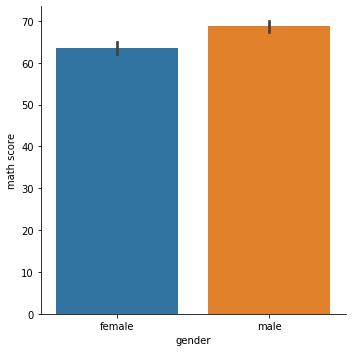

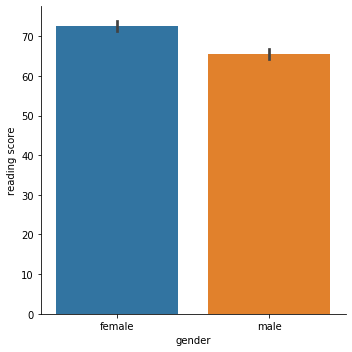

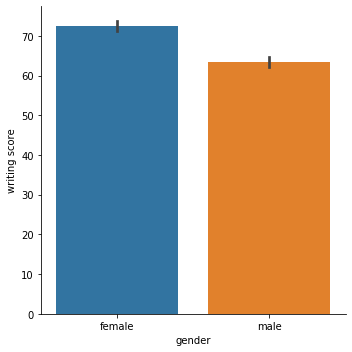

In [6]:
grid = sns.catplot(x="gender", y = "math score", kind="bar", data=data);
grid = sns.catplot(x="gender", y = "reading score", kind="bar", data=data);
grid = sns.catplot(x="gender", y = "writing score", kind="bar", data=data);

In [7]:
labels = 'Without test Preprataion', 'With Test Preparation'
data['test preparation course'].value_counts()


none         642
completed    358
Name: test preparation course, dtype: int64

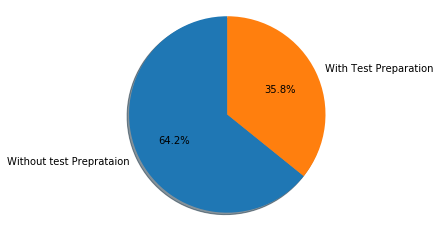

In [8]:
s1 = 642/1000*100 
s2 = 358/1000*100
sizes = [s1, s2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

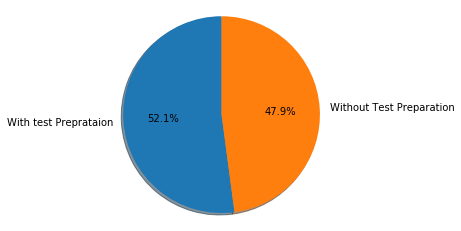

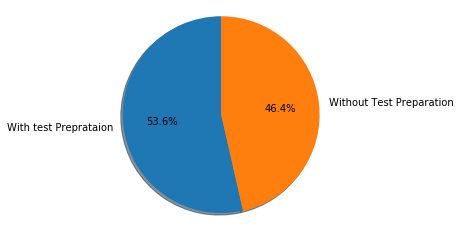

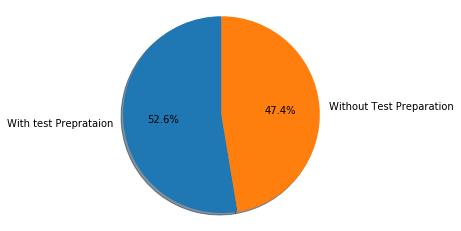

In [9]:
math_score_mean = data.groupby('test preparation course')['math score'].mean()
reading_score_mean = data.groupby('test preparation course')['reading score'].mean()
writing_score_mean = data.groupby('test preparation course')['writing score'].mean()

labels = 'With test Preprataion', 'Without Test Preparation'
sizes = [math_score_mean]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
labels = 'With test Preprataion', 'Without Test Preparation'
sizes = [writing_score_mean]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
labels = 'With test Preprataion', 'Without Test Preparation'
sizes = [reading_score_mean]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [10]:
data['ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

Text(0, 0.5, 'Writing Mean Score')

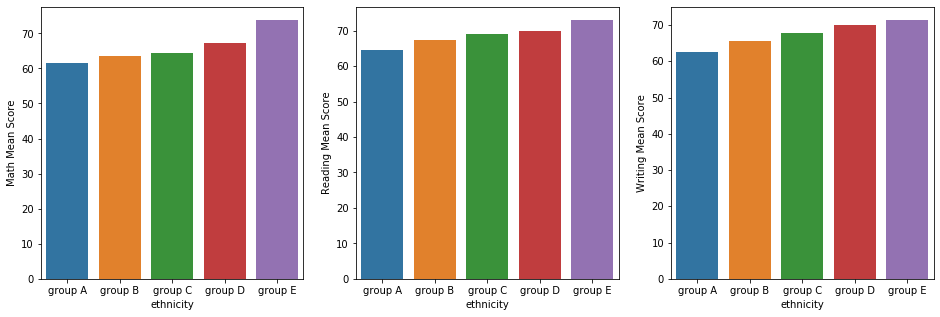

In [11]:
math_score_mean = data.groupby('ethnicity')['math score'].mean()
reading_score_mean = data.groupby('ethnicity')['reading score'].mean()
writing_score_mean = data.groupby('ethnicity')['writing score'].mean()

plt.figure(figsize=(16,5))
plt.subplot(131)
grid = sns.barplot(x= math_score_mean.index , y = math_score_mean.values)
plt.ylabel('Math Mean Score')

plt.subplot(132)
grid = sns.barplot(x= reading_score_mean.index , y = reading_score_mean.values)
plt.ylabel('Reading Mean Score')

plt.subplot(133)
grid = sns.barplot(x= writing_score_mean.index , y = writing_score_mean.values)
plt.ylabel('Writing Mean Score')


In [21]:

sns.catplot(x="gender",y= 'test preparation course', data=data);
sns.catplot(x="gender", y='test preparation course', data=data);
sns.catplot(x="gender", y='test preparation course', data=data);

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
    
Without = 'none'
With = 'completed'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['gender']=='female']
men = data[data['gender']=='male']
ax = sns.distplot(women[women['test preparation course']=='none'], bins=18, label = Without, ax = axes[0], kde =False)
ax = sns.distplot(women[women['test preparation course']=='completed'], bins=40, label = With, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

 - Is possible o see some patterns  and observations from the data visualization.
         - Females achieve better results in Reading/Writing , and males achieve the best results in math. 
         - in mean scores, the mean score gradually increases for ethnicity from pattern A to E. 